<a href="https://colab.research.google.com/github/ankit3466/Deep-Learning/blob/master/neural_style_transfer_with_tensorflow_hub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow_hub as hub

%matplotlib inline

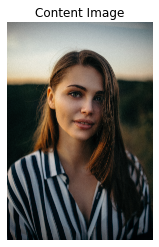

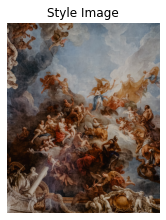

In [16]:
content_path = '/content/human.jpg'
style_path = '/content/style.jpg'

content_image = plt.imread(content_path)
style_image = plt.imread(style_path)

plt.subplot(1, 2, 1)
plt.title('Content Image')
plt.axis('off')
plt.imshow(content_image)
plt.show()

plt.subplot(1, 2, 2)
plt.title('Style Image')
plt.axis('off')
plt.imshow(style_image)
plt.show()

In [17]:
def image_to_tensor(path_to_img):
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3, dtype=tf.float32)
    
    # Resize the image to specific dimensions
    img = tf.image.resize(img, [720, 512])
    img = img[tf.newaxis, :]
    return img

In [18]:
def tensor_to_image(tensor):
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    tensor = tensor[0]
    plt.figure(figsize=(20,10))
    plt.axis('off')
    return plt.imshow(tensor)

In [19]:
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [20]:
content_image_tensor = image_to_tensor(content_path)
style_image_tensor = image_to_tensor(style_path)

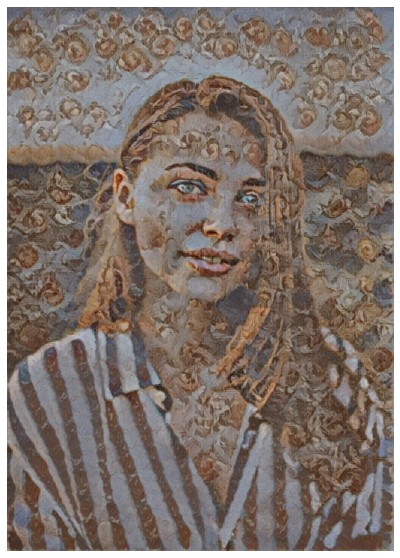

In [26]:
combined_result = hub_module(tf.constant(content_image_tensor), tf.constant(style_image_tensor))[0]
tensor_to_image(combined_result)

In [ ]:
combined_result[1]